req

conda activate base

cd digits_recogntion

source .venv/bin/activate

poetry add kagglehub --group dev

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("oddrationale/mnist-in-csv")

print("Path to dataset files:", path)

/home/alialdin/digits_recognition/digits_recogntion/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 15.2M/15.2M [00:07<00:00, 2.15MB/s]

Extracting files...


Path to dataset files: /home/alialdin/.cache/kagglehub/datasets/oddrationale/mnist-in-csv/versions/2


In [4]:
import pandas as pd
train = pd.read_csv(f"{path}/mnist_train.csv")
test = pd.read_csv(f"{path}/mnist_test.csv")
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (60000, 785)
Test shape: (10000, 785)


# visualize the data

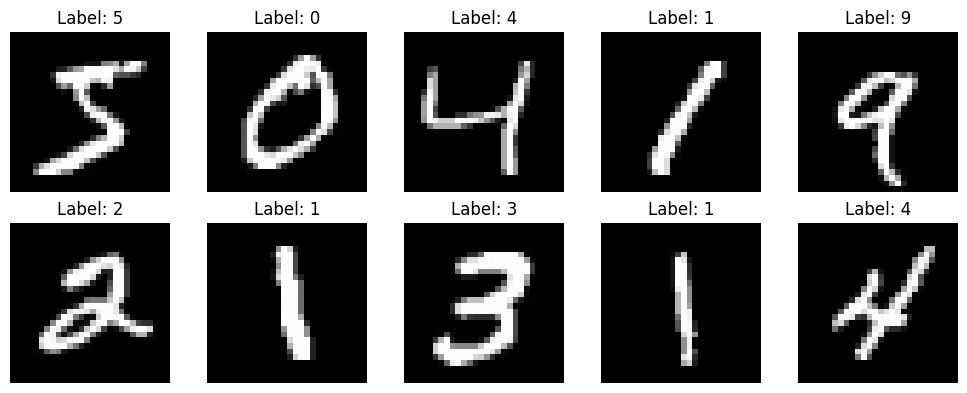

In [8]:
# visualize the data
import matplotlib.pyplot as plt
import numpy as np
def plot_digits(data, labels, num=10):
    plt.figure(figsize=(10, 4))
    for i in range(num):
        plt.subplot(2, 5, i + 1)
        img = data.iloc[i, 1:].values.reshape(28, 28)
        plt.imshow(img, cmap='gray')
        plt.title(f"Label: {labels.iloc[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
plot_digits(train, train['label'], num=10)


In [11]:
x=train.iloc[:,1:].values
y=train.iloc[:,0].values

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Training Phase
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(x, y)

# Evaluation Phase
x_test = test.iloc[:, 1:].values
y_test = test.iloc[:, 0].values
y_pred = clf.predict(x_test)

print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test accuracy: 0.9669
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.96      0.96      1032
           3       0.95      0.96      0.95      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.95      0.95       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# saving the model

In [ ]:
import os
import pickle
models_dir =os.path.join("..", "models")
os.makedirs(models_dir, exist_ok=True)
# saving the model
model_path = os.path.join(models_dir, "random_forest_mnist.pkl")
with open(model_path, "wb") as f:
    pickle.dump(clf, f)
print(f"Model saved to {model_path}")

Model saved to ../models/random_forest_mnist.pkl


# test the saved model

In [16]:
# test the saved model
rf=pickle.load(open(model_path, "rb"))
y_test_pred = rf.predict(x_test)
print("Test accuracy from loaded model:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Test accuracy from loaded model: 0.9669
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.96      0.96      1032
           3       0.95      0.96      0.95      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.95      0.95       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

